In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ten

In [ ]:
train = pd. read_csv ("sign_mnist_train.csv")
test = pd. read_csv('sign_mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
labels=train['label'].values

In [ ]:
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<Axes: ylabel='count'>

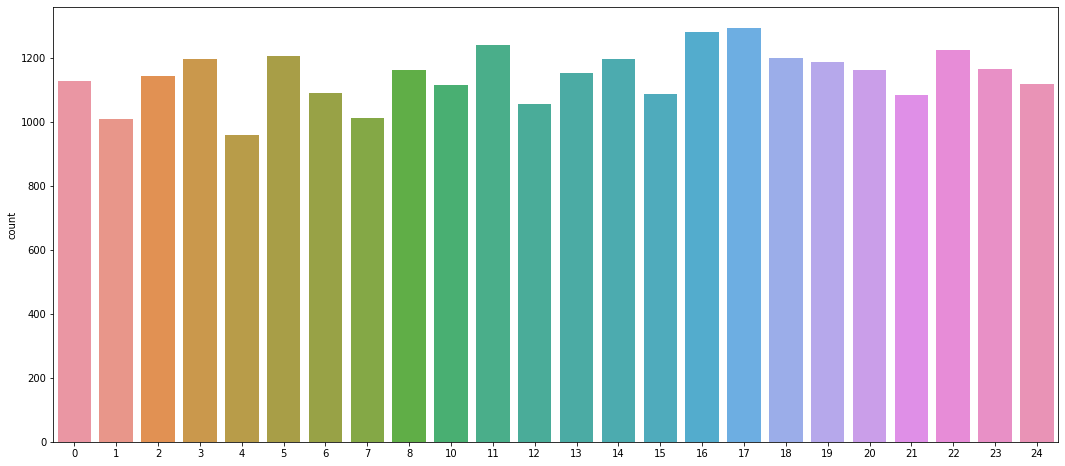

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [ ]:
train.drop('label', axis = 1, inplace = True)

In [ ]:
images= train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels= label_binrizer.fit_transform(labels)

In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
index=2
print(labels[[index]])

[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


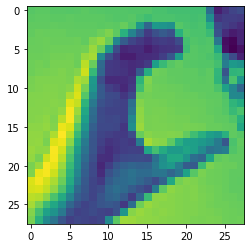

In [ ]:
plt.imshow(images[index].reshape(28,28))

In [ ]:
# import cv2
# import numpy as np
# for i in range(0, 10):
#     rand = np.random.randint(0, len(images))
#     input_im = images [rand]
#     sample= input_im.reshape (28,28).astype (np. uint8)
#     sample = cv2.resize (sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
#     cv2.imshow("sample image", sample)
#     cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
batch_size = 128
num_classes = 24
epochs = 10

In [ ]:
x_train=x_train/255
x_test=x_test/255

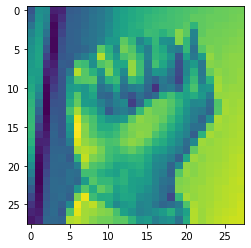

In [ ]:
x_train = x_train.reshape(x_train.shape [0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape [0], 28, 28, 1)
plt.imshow(x_train [0].reshape (28,28))

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu', input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
import tensorflow as tf

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=Adam(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=128)

Epoch 1/10
151/151 [==============================] - 33s 208ms/step - loss: 2.6572 - accuracy: 0.1843 - val_loss: 1.6710 - val_accuracy: 0.4413
Epoch 2/10
151/151 [==============================] - 33s 221ms/step - loss: 1.2864 - accuracy: 0.5650 - val_loss: 0.8604 - val_accuracy: 0.7221
Epoch 3/10
151/151 [==============================] - 35s 235ms/step - loss: 0.7952 - accuracy: 0.7257 - val_loss: 0.5811 - val_accuracy: 0.8034
Epoch 4/10
151/151 [==============================] - 30s 200ms/step - loss: 0.5507 - accuracy: 0.8099 - val_loss: 0.4131 - val_accuracy: 0.8584
Epoch 5/10
151/151 [==============================] - 31s 207ms/step - loss: 0.4001 - accuracy: 0.8661 - val_loss: 0.3079 - val_accuracy: 0.8979
Epoch 6/10
151/151 [==============================] - 31s 203ms/step - loss: 0.2924 - accuracy: 0.9035 - val_loss: 0.2138 - val_accuracy: 0.9278
Epoch 7/10
151/151 [==============================] - 31s 202ms/step - loss: 0.2117 - accuracy: 0.9308 - val_loss: 0.1258 - val_ac

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd

train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:

datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

In [ ]:

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test))

model.save('smnist.h5')

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import cv2
import mediapipe as mp
from keras.models import load_model
import numpy as np
import time
import pandas as pd

model = load_model('smnist.h5')

mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils
cap = cv2.VideoCapture(0)

_, frame = cap.read()

h, w, c = frame.shape

img_counter = 0
analysisframe = ''
letterpred = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
while True:
    _, frame = cap.read()

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    # SPACE pressed
    analysisframe = frame
    showframe = analysisframe
    cv2.imshow("Frame", showframe)
    framergbanalysis = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2RGB)
    resultanalysis = hands.process(framergbanalysis)
    hand_landmarksanalysis = resultanalysis.multi_hand_landmarks
    if hand_landmarksanalysis:
        for handLMsanalysis in hand_landmarksanalysis:
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h
            for lmanalysis in handLMsanalysis.landmark:
                x, y = int(lmanalysis.x * w), int(lmanalysis.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            y_min -= 20
            y_max += 20
            x_min -= 20
            x_max += 20 

      analysisframe = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2GRAY)
      analysisframe = analysisframe[y_min:y_max, x_min:x_max]
      analysisframe = cv2.resize(analysisframe,(28,28))
      nlist = []
      rows,cols = analysisframe.shape
      for i in range(rows):
          for j in range(cols):
              k = analysisframe[i,j]
              nlist.append(k)
      
      datan = pd.DataFrame(nlist).T
      colname = []
      for val in range(784):
          colname.append(val)
      datan.columns = colname
      pixeldata = datan.values
      pixeldata = pixeldata / 255
      pixeldata = pixeldata.reshape(-1,28,28,1)
      prediction = model.predict(pixeldata)
      predarray = np.array(prediction[0])
      letter_prediction_dict = {letterpred[i]: predarray[i] for i in range(len(letterpred))}
      predarrayordered = sorted(predarray, reverse=True)
      high1 = predarrayordered[0]
      high2 = predarrayordered[1]
      high3 = predarrayordered[2]
      for key,value in letter_prediction_dict.items():
          if value==high1:
              print("Predicted Character 1: ", key)
              print('Confidence 1: ', 100*value)
          elif value==high2:
              print("Predicted Character 2: ", key)
              print('Confidence 2: ', 100*value)
          elif value==high3:
              print("Predicted Character 3: ", key)
              print('Confidence 3: ', 100*value)
      time.sleep(5)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(framergb)
    hand_landmarks = result.multi_hand_landmarks
    if hand_landmarks:
        for handLMs in hand_landmarks:
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h
            for lm in handLMs.landmark:
                x, y = int(lm.x * w), int(lm.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            y_min -= 20
            y_max += 20
            x_min -= 20
            x_max += 20
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    cv2.imshow("Frame", frame)

cap.release()
cv2.destroyAllWindows()